# README
以下，README.mdを表示

In [ ]:
from IPython.display import display, Markdown
with open('readme.md', 'r') as fh:
    content = fh.read()
display(Markdown(content))

# 設定ファイル作成用スクリプト
#### 設定をPythonの辞書に格納．各設定の詳細は README.mdを参照
最低限，次元数 N を指定すること．

In [ ]:
from time import gmtime, strftime
import numpy as np
N = 2  # dimension, number of variables to be optimized

In [ ]:
setting = dict()
setting['flg_minimization'] = True
setting['flg_restart'] = True
setting['flg_resume'] = False
setting['flg_save'] = True
setting['flg_visualizatione'] = True
setting['dim'] = N
setting['initpopsize'] = 4 + int(3 * np.log(N))
setting['maxpopsize'] = setting['initpopsize']
setting['print_span'] = 1
setting['flag_diagonal'] = 0
setting['flag_active'] = 1
setting['maxeval'] = int(1e5) * N
setting['maxiter'] = int(1e7)
setting['seed'] = int(strftime("%Y%H%M%S", gmtime()))
setting['ftarget'] = 1e-5
setting['tolx'] = 1e-10
setting['tolf'] = 1e-10
setting['lb'] = [-5.0] * N # [-np.inf] * N
setting['ub'] = [5.0] * N # [np.inf] * N
setting['init_mean'] = (np.asarray(setting['ub']) + np.asarray(setting['lb'])) / 2.0
setting['init_std'] = (np.asarray(setting['ub']) - np.asarray(setting['lb'])) / 6.0
setting['stairwidth'] = [0] * N

#### 設定を指定したファイル名（デフォルトは"InitCmaes.txt"）で出力する．

In [ ]:
boolvals = ['flg_minimization', 'flg_restart', 'flg_resume', 'flg_save', 'flg_visualizatione']
intvals = ['dim', 'initpopsize', 'maxpopsize', 'print_span', 'flag_diagonal', 'flag_active', 'maxeval', 'maxiter', 'seed']
floatvals = ['ftarget', 'tolx', 'tolf']
arrayvals = ['lb', 'ub', 'init_mean', 'init_std', 'stairwidth']
with open('InitCmaes.txt', 'w') as f:
    for key in boolvals:
        f.write("{:>25}".format(key) + ' ' + ('T' if setting[key] else 'F'))
        f.write('\n')
    for key in intvals:
        f.write("{:>25}".format(key) + ' ' + repr(int(setting[key])))
        f.write('\n')
    for key in floatvals:
        f.write("{:>25}".format(key) + ' ' + repr(float(setting[key])))
        f.write('\n')
    for key in arrayvals:
        f.write("{:>25}".format(key) + ' ' + ' '.join([repr(float(x)) for x in setting[key]]))
        f.write('\n')

#### 問題用設定ファイル

In [ ]:
def gram_schmidt(mat):
    """Return a matrix whose row is orthonormalized"""
    R = mat.copy()
    for i in range(R.shape[0]):
        for j in range(i):
            R[i] = R[i] - np.dot(R[i], R[j]) * R[j]
        R[i] /= np.linalg.norm(R[i])
    return R

matI = np.eye(N)
matD = np.diag(np.logspace(0, 3, num=N, endpoint=True, base=1e1))
matO = gram_schmidt(np.random.randn(N, N))
matODOt = np.dot(matO.T * matD, matO)

In [ ]:
stairwidth = np.zeros(N)
matR = matO

In [ ]:
with open('InitProblem.txt', 'w') as f:
    f.write("{:>25} {}\n".format('dim', repr(N)))
    f.write("{:>25} {}\n".format('funcid', repr(2)))
    f.write("{:>25}".format('stairwidth') + ' ' + ' '.join([repr(float(x)) for x in stairwidth]))
    f.write('\n')
    f.write("{:>25}".format('matR') + ' ' + ' '.join([repr(float(x)) for x in matR.flatten(order='F')]))
    f.write('\n')

# 実行スクリプト
プログラム確認用．通常はコマンドラインから実行すれば良い．

#### 設定ファイルの確認

In [ ]:
from __future__ import print_function
cmainit = 'InitCmaes.txt'
probinit = 'InitProblem.txt'
print(cmainit)
with open(cmainit, 'r') as f:
    for line in f:
        print(line, end='')
print(probinit)        
with open(probinit, 'r') as f:
    for line in f:
        print(line, end='')

#### コンパイル

In [ ]:
!sh compile.sh clear
#!sh compile.sh
!sh compile.sh lapack

#### 実行

In [ ]:
!./main.out InitCmaes.txt InitProblem.txt

# 作図用スクリプト
実行が正しくなされれば，出力ファイル"OutputCmaes.txt"が生成される．以下を実行することで，この結果が作図され，"OutputCmaes.png"および"OutputCmaes.pdf"が生成される．

### 横軸
イテレーション．各イテレーションでpopsize回目的関数を評価している．

### 左上図
* arffeas : 各イテレーションで得られた目的関数評価値の最小値
* arf     : 各イテレーションで得られた適応度（目的関数＋ペナルティ）の最小値

### 中上図
* arffeas-min(arffeas) : 各イテレーションで得られた目的関数評価値の最小値から，探索中に得られた最良のarffeasを引いた値．Logスケール．
* arf-min(arffeas)     : 各イテレーションで得られた適応度（目的関数＋ペナルティ）の最小値から，探索中に得られた最良のarffeasを引いた値．Logスケール．

### 右上図
* df      : 評価値の広がり．tolf以下になると打ち切り
* dx      : 変数の広がり．tolx以下になると打ち切り
* sigma   : CMA-ESのステップサイズ

### 左下図 
共分散行列の各固有値の平方根．密度の等高線（楕円）の軸の半径

### 中下図
平均ベクトルの各座標

### 右下図
共分散行列の各対角成分の平方根．座標ごとの標準偏差

共分散行列の各固有値の平方根のグラフと各対角成分の平方根のグラフが類似している
場合，目的関数はおおよそ変数分離可能（変数間依存性が弱い）と推測される．
一般に，共分散行列は目的関数のヘッセ行列（二回微分）の逆行列に収束していく．
すなわち，共分散行列の逆行列は変数の感度を表す．



In [1]:
import numpy as np
import matplotlib.pyplot as plt

dat = np.loadtxt('OutputCmaes.txt')
N = (dat.shape[1] - 6) // 3

fig = plt.figure(figsize=(10, 8))
xarr = np.arange(1, dat.shape[0] + 1, dtype=int)
# xarr = dat[:, 0]
ax = plt.subplot(231)
ax.plot(xarr, dat[:, 1], label='arffeas')
ax.plot(xarr, dat[:, 2], label='arf')
ax.legend(fontsize='small', loc='best')
ax.grid()

ax = plt.subplot(232)
ax.plot(xarr, dat[:, 1] - dat[:, 1].min(), label='arffeas - min(arffeas)')
ax.plot(xarr, dat[:, 2] - dat[:, 1].min(), label='arf - min(arffeas)')
ax.set_yscale('log')
ax.legend(fontsize='small', loc='best')
ax.grid()

ax = plt.subplot(233)
ax.plot(xarr, dat[:, 3], label='df')
ax.plot(xarr, dat[:, 4], label='dx')
ax.plot(xarr, dat[:, 5], label='sigma')
ax.set_yscale('log')
ax.legend(fontsize='small', loc='best')
ax.grid()

ax = plt.subplot(234)
sqrtd = np.sort(dat[:, 6:6 + N], axis=1)
ax.plot(xarr, sqrtd)
ax.set_yscale('log')
ax.set_ylabel('sqrt of eig. of C')
ax.grid()

ax = plt.subplot(235)
ax.plot(xarr, dat[:, 6 + N:6 + 2 * N])
ax.set_ylabel('mean vector')
ax.grid()

ax = plt.subplot(236)
ax.plot(xarr, dat[:, 6 + 2 * N:6 + 3 * N])
ax.set_ylabel('sqrt of diag of C')
ax.set_yscale('log')
ax.grid()

plt.tight_layout()
plt.savefig('OutputCmaes.png')
plt.savefig('OutputCmaes.pdf')

#### 生成されたPNGファイルを確認
確認用

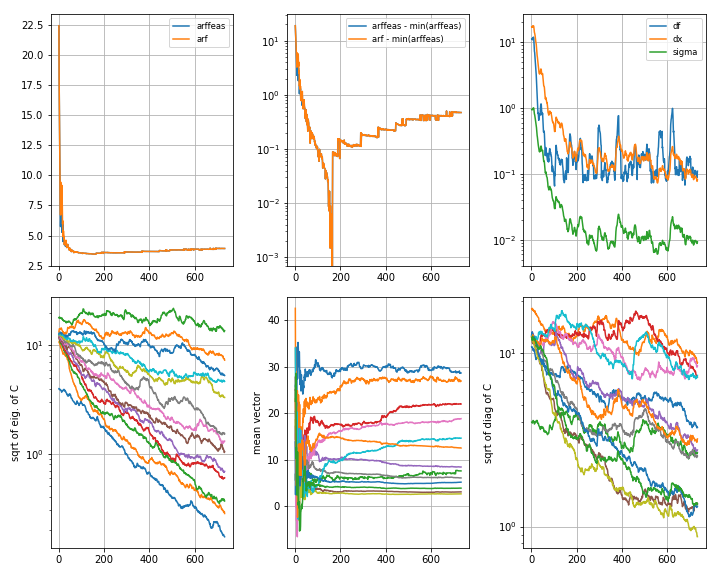

In [2]:
from IPython.display import Image
Image(filename=('OutputCmaes.png'))

# アニメーション作成用スクリプト
flg_visualizatione = T として実行した場合，VisualizeCmaes.txtが生成される．以下を実行することで，アニメーションが作成される．ffmpegがインストールされている環境であれば，mp4形式でアニメーションを保存することも可能．

#### 実行時のCMA-ES設定ファイルとVisualizeCmaes.txtから必要な情報を抽出

In [85]:
import numpy as np

def property2dict(filename):
    out = dict()
    with open(filename, "r") as f:
        lines = f.readlines()
    for line in lines:
        key_value_list = line.split()
        out[key_value_list[0]] = key_value_list[1:]
    return out

# 実行時のCMA-ES設定ファイル．必要に応じて変更
cmainit = "InitCmaes.txt"  
opts = property2dict(cmainit)
N = int(opts['dim'][0])
L = int(opts['initpopsize'][0])
init_mean = np.array([float(x) for x in opts['init_mean']])
init_std = np.array([float(x) for x in opts['init_std']])
init_sigma = 1.0
init_cov = np.diag(init_std * init_std).flatten()

# arf, arffeas, arx, arxfeas, sigma, xmean, cov
# L + L + L*N + L*N + 1 + N + N*N
dat = np.loadtxt('VisualizeCmaes.txt')
L = (dat.shape[1] - 1 - N - N * N) // (2 + 2 * N)
if 2 * L * (1 + N) + N * N + N + 1 != dat.shape[1]:
    raise ValueError("Invalid Dimension or Broken File: VisualizeCmaes.txt")
T = dat.shape[0]

#### アニメーションで用いる二次元の選択
originは原点となる座標．v1およびv2はそれぞれ図におけるx軸とy軸に対応．
図中の座標(a, b)の点は，N次元探索空間上の点 $x = origin + a \times v1 + b \times v2$ に対応．
一次元目と二次元目をプロットする場合，以下のように設定する．

In [86]:
origin = np.zeros(N)
v1 = np.zeros(N)
v1[2] = 1.0
v2 = np.zeros(N)
v2[3] = 1.0

#### 選択した二次元に射影

In [87]:
from cmavisualization import project_vec, project_cov
# arf, arffeas, arx, arxfeas, sigma, xmean, cov
# L + L + L*N + L*N + 1 + N + N*N
arf_list = dat[:, :L]
arx_list = project_vec(dat[:, 2*L:2*L+L*N].reshape((-1, N)), origin, v1, v2).reshape((-1, 2*L))
sigma_list = dat[:, 2*L+2*L*N:2*L+2*L*N+1]
mean_list = project_vec(dat[:, 2*L+2*L*N+1:2*L+2*L*N+1+N], origin, v1, v2)
cov_list = project_cov(dat[:, 2*L+2*L*N+1+N:], v1, v2)
init_m = project_vec([init_mean], origin, v1, v2)
init_c = project_cov([init_cov], v1, v2)
init_s = 1.0

#### 収束曲線用データ

In [88]:
import numpy as np
dat = np.loadtxt('OutputCmaes.txt')
N = (dat.shape[1] - 6) // 3
var_dict = dict()
# var_dict['arffeas'] = dat[:, 1]
# var_dict['arf - min(arf)'] = dat[:, 2] - dat[:, 2].min()
var_dict['sigma'] = dat[:, 5]
var_dict['xmean'] = dat[:, 6 + N:6 + 2 * N]
var_dict['sqrt of eig. of C'] = dat[:, 6:6 + N]
var_dict['sqrt of diag of C'] = dat[:, 6 + 2 * N:6 + 3 * N]

#### 背景画像データ
バックグラウンドに画像を表示させるためには，画像を生成するためのデータを用意する．以下の例に従い，画像用データファイル名，画像データのx軸に対応する列，y軸に対応する列，および画像用の列を指定する．例えば，ファイルの構成がx, y, fなどとなっているようであれば，1, 2, 3とそれぞれ代入すればよい．以下を実行しなければ，背景画像は表示されない．

In [ ]:
from cmavisualization import extract_meshdata
imagefilename = 't3post_elem.dat'  # 背景画像用データ
column_list = [0, 1, 3]  # x, y, z軸用の列を選択．インデックスは0から
clip_filter_dict = {2:(-50.01, -49.99)} # 列2の値が指定された範囲内の行のみ抽出
bg_mesh_data = extract_meshdata(imagefilename, column_list, clip_filter_dict)
flg_cb = True  # カラーバーの表示

#### アニメーションインスタンスの作成

In [ ]:
%matplotlib
from cmavisualization import CmaVisualization
cv = CmaVisualization(m_hist=mean_list, 
                      s_hist=sigma_list, 
                      c_hist=cov_list, 
                      init_m=init_m, 
                      init_s=init_s,
                      init_c=init_c,
                      x_hist=arx_list,
                      f_hist=arf_list,
                      bg_mesh_data=bg_mesh_data,
                      **var_dict)
cv.fig_setting(flg_cb=flg_cb, xmin=bg_mesh_data[0].min(), ymin=bg_mesh_data[1].min(), xmax=bg_mesh_data[0].max(), ymax=bg_mesh_data[1].max())

In [89]:
%matplotlib  
from cmavisualization import CmaVisualization
cv = CmaVisualization(m_hist=mean_list, 
                      s_hist=sigma_list, 
                      c_hist=cov_list, 
                      init_m=init_m, 
                      init_s=init_s,
                      init_c=init_c,
                      x_hist=arx_list,
                      f_hist=arf_list,
                      **var_dict)
cv.fig_setting()

Using matplotlib backend: Qt5Agg


#### 以下，繰り返し実行

In [172]:
cv.draw()

AssertionError: It's over. If you want to play it again, please reset the iteration counter by 'reset_counter'.

#### ffmpeg (https://www.ffmpeg.org/) がインストールされている場合には，以下で動画を保存

In [ ]:
cv.save(filename='AnimationCmaes.mp4')